# Skin segmentation with different technic



## Skin detection in different color spaces with thresholds

Sources: https://arxiv.org/pdf/1708.02694

In [210]:
# Imports
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [211]:
# Setup image path
img_1_path = "/content/1728293261557.jpeg"

In [212]:
# Open images with PIL
with Image.open(img_1_path) as img_1:
  img_1.load()

In [213]:
# Check images mode and size
img_1.mode, img_1.size

('RGB', (1080, 1920))

In [214]:
# Resize the image
img_1 = img_1.reduce(4)
img_1.mode, img_1.size

('RGB', (270, 480))

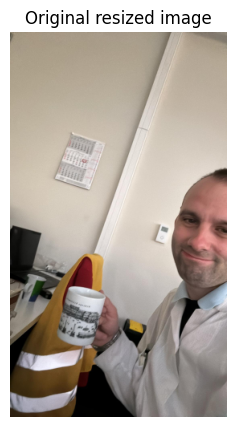

In [215]:
# Plot the image
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.imshow(img_1)
ax.set_title("Original resized image")
ax.axis("off")
plt.show()

### Skin detection in RGB color space.

In [216]:
# Make a function to split the RGB image into R, G, B channels
def rgb_channels(image):
  """
  Split RGB image into R, G, B channels.
  """
  # Convert PIL Image to numpy array
  image = np.array(image)
  # Get R, G, B components
  r, g, b = image[:,:,0], image[:,:,1], image[:,:,2]

  return r, g, b

In [217]:
red_channel, green_channel, blue_channel = rgb_channels(img_1)

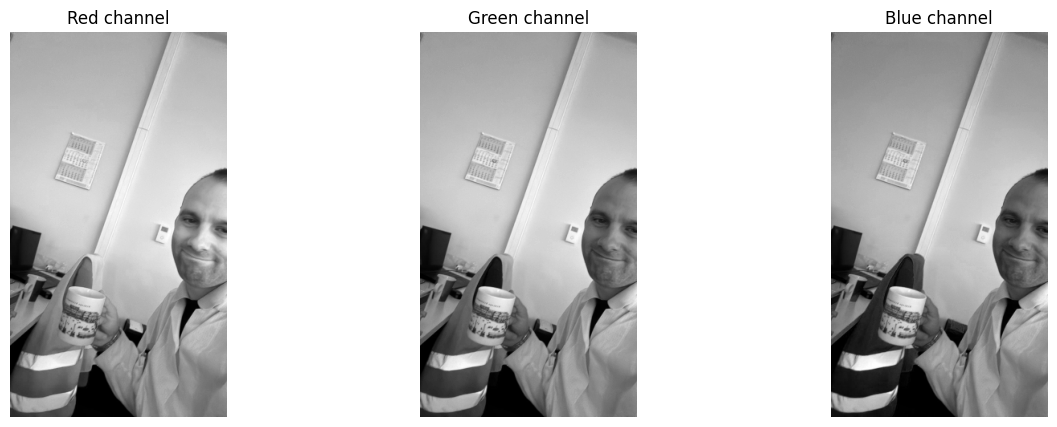

In [218]:
# Visualize Red,Green,Blue color channels
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(red_channel, cmap='gray')
ax[0].set_title("Red channel")
ax[0].axis("off")
ax[1].imshow(green_channel, cmap='gray')
ax[1].set_title("Green channel")
ax[1].axis("off")
ax[2].imshow(blue_channel, cmap='gray')
ax[2].set_title("Blue channel")
ax[2].axis("off")
plt.show()

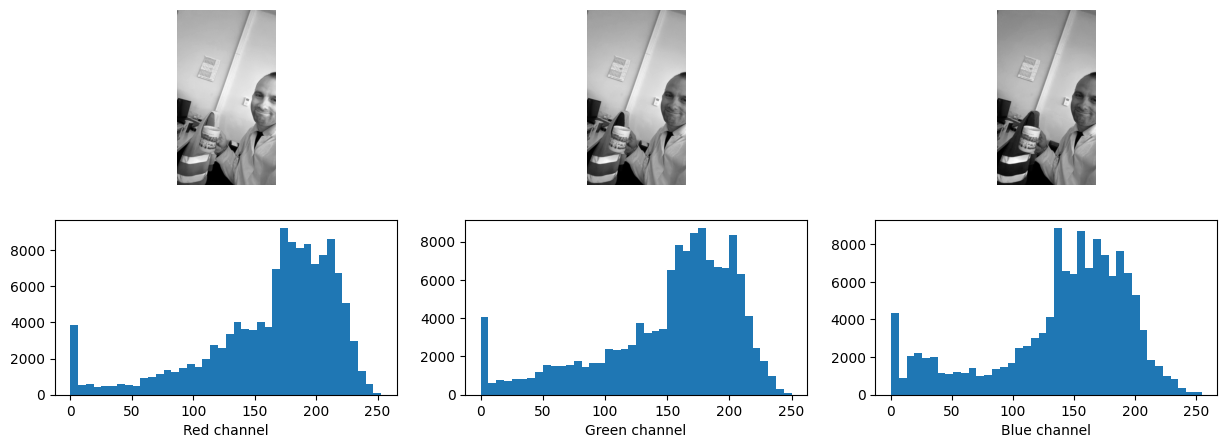

In [219]:
fig, ax = plt.subplots(2,3, figsize=(15,5))

ax[0,0].imshow(red_channel, cmap='gray')
ax[0,0].axis("off")
ax[0,1].imshow(green_channel, cmap='gray')
ax[0,1].axis("off")
ax[0,2].imshow(blue_channel, cmap='gray')
ax[0,2].axis("off")
ax[1, 0].hist(red_channel.ravel(), bins=40, range=(red_channel.min(), red_channel.max()))
ax[1, 0].set_xlabel('Red channel')
ax[1, 1].hist(green_channel.ravel(), bins=40, range=(green_channel.min(), green_channel.max()))
ax[1, 1].set_xlabel('Green channel')
ax[1, 2].hist(blue_channel.ravel(), bins=40, range=(blue_channel.min(), blue_channel.max()))
ax[1, 2].set_xlabel('Blue channel')

plt.show()

In [220]:
face_red = red_channel[200:310, 220:270]
face_green = green_channel[200:310, 220:270]
face_blue = blue_channel[200:310, 220:270]

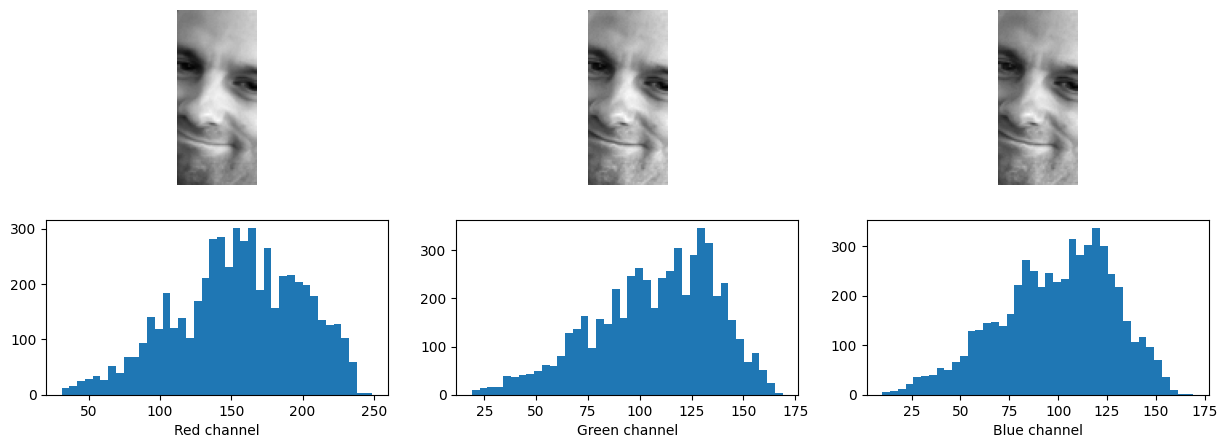

In [221]:
fig, ax = plt.subplots(2,3, figsize=(15,5))

ax[0,0].imshow(face_red, cmap='gray')
ax[0,0].axis("off")
ax[0,1].imshow(face_green, cmap='gray')
ax[0,1].axis("off")
ax[0,2].imshow(face_blue, cmap='gray')
ax[0,2].axis("off")
ax[1, 0].hist(face_red.ravel(), bins=40)
ax[1, 0].set_xlabel('Red channel')
ax[1, 1].hist(face_green.ravel(), bins=40)
ax[1, 1].set_xlabel('Green channel')
ax[1, 2].hist(face_blue.ravel(), bins=40)
ax[1, 2].set_xlabel('Blue channel')

plt.show()

In [222]:
face_red.min(), face_red.max(), face_green.min(), face_green.max(), face_blue.min(), face_blue.max()

(31, 249, 19, 169, 10, 169)

In [223]:
low_color = (31,19,10)
up_color = (249,169,169)
offset = 20

In [224]:
def make_my_mask(image ,light_color, dark_color, offset):
  """
  Make a mask for the image.
  """
  # Convert PIL Image to numpy array
  image = np.array(image)

  mask_red = (light_color[0]+offset <= image[:,:,0]) & (image[:,:,0] <= dark_color[0]-offset)
  mask_green = (light_color[1]+offset <= image[:,:,1]) & (image[:,:,1] <= dark_color[1]-offset)
  mask_blue = (light_color[2]+offset <= image[:,:,2]) & (image[:,:,2]<= dark_color[2]-offset)

  logical_mask = np.logical_and(np.logical_and(mask_red, mask_green), mask_blue)
  mask = np.array([255 if x == True else 0 for x in np.nditer(logical_mask)]).reshape(image.shape[0], image.shape[1])

  return mask, mask_red, mask_green, mask_blue

In [225]:
rgb_mask, r, g, b =make_my_mask(img_1, low_color, up_color, offset)

In [226]:
digitalize = lambda logical_mask, image : np.array([255 if x == True else 0 for x in np.nditer(logical_mask)]).reshape(image.height, image.width)

In [227]:
mask_r = digitalize(logical_mask=r, image=img_1)
mask_g = digitalize(logical_mask=g, image=img_1)
mask_b = digitalize(logical_mask=b, image=img_1)

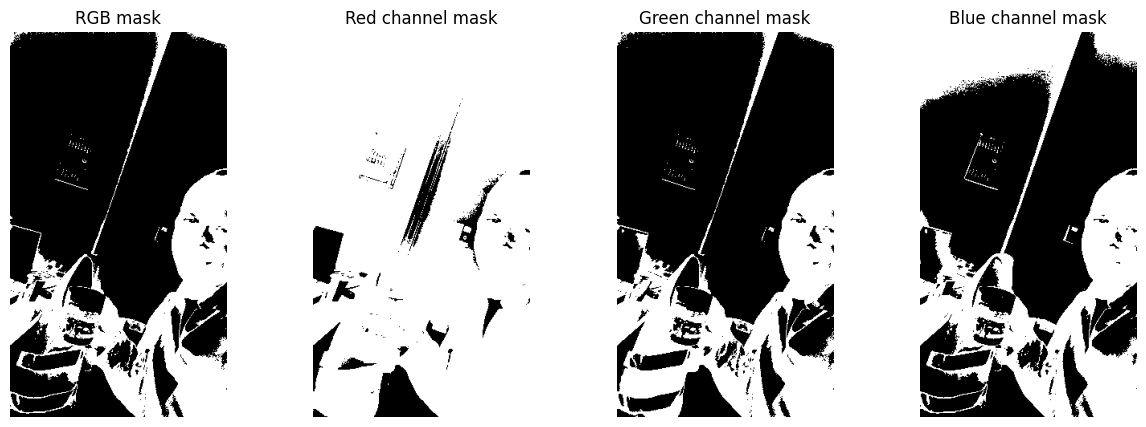

In [228]:
fig, ax = plt.subplots(1,4, figsize=(15,5))
ax[0].imshow(rgb_mask, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("RGB mask")
ax[0].axis("off")
ax[1].imshow(mask_r, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Red channel mask")
ax[1].axis("off")
ax[2].imshow(mask_g, cmap='gray', vmin=0, vmax=255)
ax[2].set_title("Green channel mask")
ax[2].axis("off")
ax[3].imshow(mask_b, cmap='gray', vmin=0, vmax=255)  # vmin=0, vmax=255 settings to show white pictures in
ax[3].set_title("Blue channel mask")
ax[3].axis("off")
plt.show()

In [229]:
def use_the_mask(image_to_customize, mask):
  for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
      if mask[i,j] == 0:
        image_to_customize.putpixel((j,i), (0,0,0))
  return image_to_customize

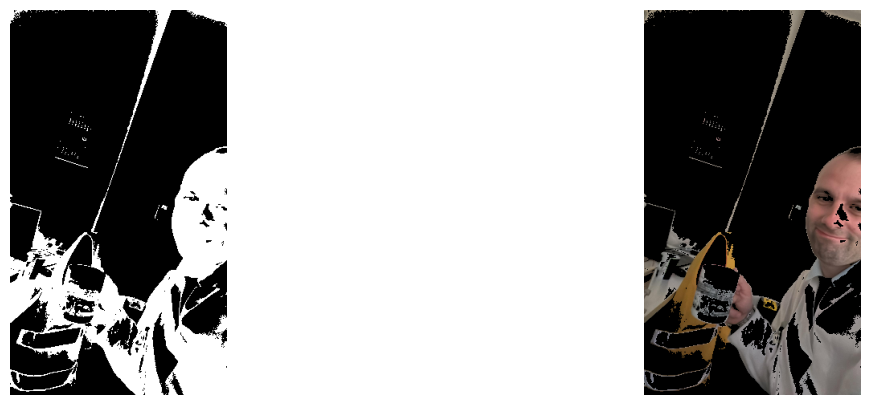

In [230]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(rgb_mask, cmap='gray')
ax[0].axis("off")
ax[1].imshow(use_the_mask(img_1, rgb_mask))
ax[1].axis("off")
plt.show()

R > 95 and G > 40 and B > 20 and R > G and R > B
and | R - G | > 15 and A > 15

In [231]:
new_mask = (red_channel > 95) &  (green_channel > 40) & (blue_channel > 20) & (red_channel > green_channel) & (red_channel > blue_channel) & (np.abs(red_channel - green_channel) > 15) & (red_channel > 15)

In [232]:
new_rgb_mask = np.array([255 if x == True else 0 for x in np.nditer(new_mask)]).reshape(img_1.height, img_1.width)

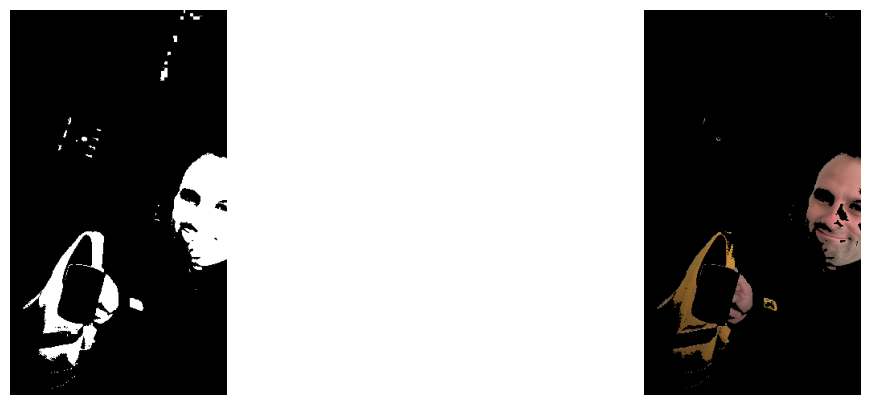

In [233]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(new_rgb_mask, cmap='gray')
ax[0].axis("off")
ax[1].imshow(use_the_mask(img_1, new_rgb_mask))
ax[1].axis("off")
plt.show()

###  Skin detection in HSV color space.